![imagen](./img/python.jpg)

# Lectura Escritura

En este módulo vas a ver diferentes maneras de leer y escribir datos desde archivos locales. 

Rara vez trabajarás únicamente con los datos que genere tu programa de Python, sino que lo normal será acudir a una fuente de datos, o leer de algún archivo.

Más adelante veremos la integración Python + BBDD


### Los formatos más utilizados son JSON (que ya estudiamos) y XML (que estudiaremos a continuación)

### XML
El formato **XML** (eXtensible Markup Language) es parecido al HTML, pero es más estructurado.

<img src="https://docs.adaptive-vision.com/current/studio/img/manual/XmlDescription.png">

Los archivos XML forman una estructura de tipo árbol y tienen cierto parentesco con los diccionarios (modelo clave/valor)

<img src="https://www.cdn.geeksforgeeks.org/wp-content/uploads/parsing-XML.gif">



Vamos a leer el archivo XML cd_catalog con la librería `ElementTree`
Un XML está compuesto de tags y atributos y es posible leer desde un archivo local, aunque también aparecen mucho en páginas web, bases de datos...

In [20]:
import xml.etree.ElementTree as ET
tree = ET.parse('data/ejemplo.xml')
print(type(tree))
root = tree.getroot()
root

<class 'xml.etree.ElementTree.ElementTree'>


<Element 'data' at 0x000001EF46E3DAD0>

Dentro de root, hay n elementos, considerados como los *children* de root. Cada elemento del XML tiene un *tag* y varios atributos en formato clave-valor.

In [2]:
for child in root:
    print(child.tag)
    print(child.attrib)
    print(child.attrib.get('name') + '\n')

country
{'name': 'Liechtenstein'}
Liechtenstein

country
{'name': 'Singapore'}
Singapore

country
{'name': 'Panama'}
Panama

country
{'name': 'Kiribati'}
Kiribati



Para obtener los children de cada línea:

In [3]:
for node in root.iter():
    print(node.tag)

data
country
rank
year
gdppc
neighbor
rank
year
gdppc
neighbor
rank
year
gdppc
country
rank
year
gdppc
neighbor
country
country
rank
year
gdppc
neighbor
neighbor
country
rank
year
gdppc


Los elementos van ordenados, por lo que podremos acceder a los mismos mediante su orden siguiendo reglas muy similares a cuando utilizamos listas

Si queremos acceder a lo que hay dentro de los tags: `.text`. Devuelve un String (como `input`), aunque estemos hablando de un número.

In [4]:
print(root[1][1])
print(root[1][1].text)

<Element 'year' at 0x000001EF46426200>
2011


Para iterar sobre unos elementos concretos. 
Podría haber atributos que se llamen igual en diferentes puntos del XML (es más, es lo habitual), y quizá ese no siempre deseamos acceder a todos.

In [5]:
for neighbor in root.iter('neighbor'):
    print(type(neighbor))
    print(neighbor.attrib)
    print(neighbor.attrib['name'])

<class 'xml.etree.ElementTree.Element'>
{'name': 'Austria', 'direction': 'E'}
Austria
<class 'xml.etree.ElementTree.Element'>
{'name': 'Switzerland', 'direction': 'W'}
Switzerland
<class 'xml.etree.ElementTree.Element'>
{'name': 'Malaysia', 'direction': 'N'}
Malaysia
<class 'xml.etree.ElementTree.Element'>
{'name': 'Costa Rica', 'direction': 'W'}
Costa Rica
<class 'xml.etree.ElementTree.Element'>
{'name': 'Colombia', 'direction': 'E'}
Colombia


1. `find` para buscar el primer tag dentro del árbol inmediato, y no de sus hijos. 
*   Devuelve un elemento
2. `findall` para buscar solo elementos hijos directos del elemento actual con un tag determinado
*   Devuelve un iterable o None
3. `iter` para buscar un tag dentro de todo un árbol, incluidos sus hijos. 
*   Devuelve un iterable o None
4. `get` para conseguir el valor de un atributo (atributo != text)
*   Devuelve un str o error


In [26]:
for country in root.findall('country'):
    rank = country.find('rank').text
    name = country.get('name')
    print(name, rank)

Liechtenstein 1
Singapore 4
Panama 68
Kiribati 140


In [47]:
# Solo un país vecino
for country in root.findall('country'):
    neighbor = country.find('neighbor')
    if neighbor != None:
        neighbor_text = neighbor.get('name')
    else:
        neighbor_text = 'Sin vecinos'
    name = country.get('name')
    print(name, neighbor_text)

Liechtenstein Austria
Singapore Malaysia
Panama Costa Rica
Kiribati Sin vecinos


In [50]:
# Todos los paises vecinos
for country in root.findall('country'):
    for neighbor in country.findall('neighbor'):
        if neighbor != None:
            neighbor_text = neighbor.get('name')
        else:
            neighbor_text = 'Sin vecinos'
        name = country.get('name')
        print(name, neighbor_text)

Liechtenstein Austria
Liechtenstein Switzerland
Singapore Malaysia
Panama Costa Rica
Panama Colombia


In [51]:
# Equivalente pero más "arriegado" y lento, ya que busca posibles etiquetas 'neighbor' de forma recursiva
for country in root.findall('country'):
    for neighbor in country.iter('neighbor'):
        if neighbor != None:
            neighbor_text = neighbor.get('name')
        else:
            neighbor_text = 'Sin vecinos'
        name = country.get('name')
        print(name, neighbor_text)

Liechtenstein Austria
Liechtenstein Switzerland
Singapore Malaysia
Panama Costa Rica
Panama Colombia


In [41]:
# Iter busca dentro de los hijos, puede no tener sentido!
for country in root.findall('country'):
    for rank in country.iter('rank'):
        if rank != None:
            rank_text = rank.text
        else:
            rank_text = 'Sin ranking'
        name = country.get('name')
        print(name, rank_text)

Liechtenstein 1
Liechtenstein 38
Liechtenstein 3
Singapore 4
Panama 68
Kiribati 140


También podríamos modificarlo

In [100]:
import xml.etree.ElementTree as ET
tree = ET.parse('data/ejemplo.xml')
print(type(tree))
root = tree.getroot()

<class 'xml.etree.ElementTree.ElementTree'>


In [101]:
for rank in root.iter('rank'):
    new_rank = int(rank.text)+1 
    rank.text = str(new_rank)
    rank.set('updated', 'yes')

In [102]:
for country in root.findall('country'):
    rank = country.find('rank').text 
    name = country.get('name') 
    print(name, rank)

Liechtenstein 2
Singapore 5
Panama 66
Kiribati 141


In [103]:
tree.write('ejemplo_rank_add_1_iter.xml')

In [106]:
import xml.etree.ElementTree as ET
tree = ET.parse('data/ejemplo.xml')
print(type(tree))
root = tree.getroot()

<class 'xml.etree.ElementTree.ElementTree'>


In [107]:
for country in root.findall('country'):
    rank = country.find('rank')
    new_rank = int(rank.text)+1 
    rank.text = str(new_rank)
    rank.set('updated', 'yes')

In [108]:
for country in root.findall('country'):
    rank = country.find('rank').text 
    name = country.get('name') 
    print(name, rank)

Liechtenstein 2
Singapore 5
Panama 66
Kiribati 141


In [109]:
tree.write('ejemplo_rank_add_1_find.xml')

O eliminar elementos

In [110]:
for country in root.findall('country'):
    rank = int(country.find('rank').text)
    if rank > 50:
        root.remove(country)
tree.write('ejemplo_remove_rand_over_50.xml')

In [111]:
for country in root.findall('country'):
    rank = int(country.find('rank').text)
    if rank > 30:
        root.remove(country)
tree.write('ejemplo_remove_rand_over_30.xml')

Cada elemento que encuentra `findall()` o `iter()` es un `Element`, sobre el que podemos acceder a sus datos gracias a atributos como como `tag` o `attrib`.

Acceso mediante XPath. Ya que la estructura de los XML es un árbol de tags, podremos acceder a los elementos mediante la ruta relativa de los tags.

In [121]:
import xml.etree.ElementTree as ET
tree = ET.parse('data/ejemplo.xml')
print(type(tree))
root = tree.getroot()

<class 'xml.etree.ElementTree.ElementTree'>


In [122]:
print(root.findall('./country/neighbor'))

[<Element 'neighbor' at 0x000001EF46E6A5C0>, <Element 'neighbor' at 0x000001EF46E6A480>, <Element 'neighbor' at 0x000001EF46E6A200>, <Element 'neighbor' at 0x000001EF46E6A020>, <Element 'neighbor' at 0x000001EF46E69FD0>]


In [123]:
for n in root.findall('./country/neighbor'):
    print(n.get('name'))

Austria
Switzerland
Malaysia
Costa Rica
Colombia


In [127]:
print(root.find('./country/neighbor'))

<Element 'neighbor' at 0x000001EF46E6A5C0>


In [128]:
for n in root.find('./country/neighbor'):
    print(n.get('name'))

In [130]:
root.find('./country/neighbor').get('name')

'Austria'

# XML con RSS
RSS es una manera que tienen las páginas web de publicar su contenido. En este caso no es un HTML, ni un CSS como se hace habitualmente, sino que será un XML, con un árbol de tags y distinta información. 

Páginas que utilizan esto son periódicos, foros o blogs. Permite acceder a los titulares de noticias, tanto de las generales, como de las secciones del periódico, de tal manera que puedas monitorizarlos en una aplicación. Los datos son abiertos y el formato de publicación es XML.

En nuestro caso vamos a desarrollar un programa mediante el que recogeremos el RSS del periódico *El Pais* y montaremos una tabla con las principales noticias.

In [131]:
from urllib.request import urlopen
from xml.etree.ElementTree import parse

var_url = urlopen('https://elpais.com/rss/elpais/portada.xml')
xmldoc = parse(var_url)

for item in xmldoc.findall('./channel/item'):
    title = item.findtext('title')
    date = item.findtext('pubDate')
    link = item.findtext('link')
    
    print(title, date, link)

Un periodista que viajó a Milán para cubrir el Valencia-Atalanta, positivo por coronavirus Thu, 27 Feb 2020 17:13:44 +0200 https://elpais.com/sociedad/2020/02/27/actualidad/1582795523_075914.html#?ref=rss&format=simple&link=link
Mapa de la expansión y claves para entender el coronavirus de Wuhan Sun, 1 Mar 2020 15:16:43 +0200 https://elpais.com/sociedad/2020/02/26/actualidad/1582712658_011286.html#?ref=rss&format=simple&link=link
El turismo italiano se resiente; España mira expectante Thu, 27 Feb 2020 15:26:25 +0200 https://elpais.com/sociedad/2020/02/26/actualidad/1582751511_964259.html#?ref=rss&format=simple&link=link
“La magnitud del problema del coronavirus no será diferente a una gripe” Thu, 27 Feb 2020 19:26:43 +0200 https://elpais.com/sociedad/2020/02/26/actualidad/1582744701_468958.html#?ref=rss&format=simple&link=link
Seis italianos encerrados por partida doble Thu, 27 Feb 2020 13:36:34 +0200 https://elpais.com/sociedad/2020/02/26/actualidad/1582745125_354016.html#?ref=rss&for

# SFTP

[S]FTP (*[Secure] File Transfer Protocol*) es un protocolo que permite mover archivos online. 

En Python, podemos utilizar SFTP con la librería `paramiko`. Vamos a conectarnos a un servidor SFTP 

https://docs.paramiko.org/en/latest/api/sftp.html

In [145]:
import paramiko
paramiko.util.log_to_file("paramiko.log")

# Open a transport
host,port = "access994526291.webspace-data.io",22
transport = paramiko.Transport((host,port))

# Auth    
username,password = "acc1635317943","BootcampFeb24"
transport.connect(None,username,password)

# Go!    
sftp = paramiko.SFTPClient.from_transport(transport)




In [ ]:

# Download
filepath = "texto_plano.txt"
localpath = "texto_plano.txt"
sftp.get(filepath,localpath)

filepath = "subcarpeta/mlp.zip"
localpath = "deep.zip"
sftp.get(filepath,localpath)

In [146]:
#Upload
filepath = "/subcarpeta/paramiko.log"
localpath = "paramiko.log"
sftp.put(localpath,filepath)


<SFTPAttributes: [ size=64560 uid=10028756 gid=600 mode=0o100604 atime=1711095829 mtime=1711095829 ]>

In [ ]:

# Close
if sftp: sftp.close()
if transport: transport.close()

## Bajar datos de Bicimad

In [148]:
# Importamos librerias
import requests
import zipfile
import pandas as pd

In [149]:
url = "https://pbs.twimg.com/profile_images/616689518968762368/rkhjKqNb.jpg"
image = requests.get(url)

In [150]:
image

<Response [200]>

In [151]:
with open("mutenrroy.jpg", 'wb') as f:
    f.write(image.content)

In [153]:
# https://opendata.emtmadrid.es/getattachment/037ee8a5-b824-43b1-ac7b-76225c783993/201810_Usage_Bicimad.aspx
url = 'https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx'
r = requests.get(url)

In [154]:
# Guardamos el zip
filename = 'bicis.zip'
with open(filename, 'wb') as f:
   f.write(r.content)

In [155]:
# Extraemos lo que hay dentro
filename = 'bicis.zip'
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(".")

In [162]:
# Leemos los datos
datos_bicis = pd.read_csv('trips_23_02_February.csv', nrows=10000, sep=";")

In [163]:
# Vemos qué pinta tienen
datos_bicis.head()

,fecha,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-01,7337.0,1.0,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',2023-02-01T00:00:10,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01T00:05:41,31.0,3.0,27 - Huertas,43.0,3.0,39 - Plaza de la Cebada
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-01,5098.0,1.0,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:25,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01T00:00:44,52.0,22.0,48 - Embajadores 2,52.0,22.0,48 - Embajadores 2
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
datos_bicis['address_lock']

0                                  NaN
1          'Plaza de la Cebada nº 16 '
2                                  NaN
3       'Glorieta de Embajadores nº 2'
4                                  NaN
                     ...              
9995    'Calle General Pardiñas nº 56'
9996                               NaN
9997            'Paseo Imperial nº 20'
9998                               NaN
9999              'Calle Orense nº 12'
Name: address_lock, Length: 10000, dtype: object

# Acceso a archivos de la pagina de datos.gob.es
Uno de los mayores catálogos de información pública descargable en España

In [179]:
# https://datos.gob.es/es/catalogo/ea0003337-principales-indicadores-de-sostenibilidad1

url = "https://data.renfe.com/dataset/928d911e-00ca-437b-be3f-068fc1f97800/resource/63d285e8-9f52-410b-8412-8a8c26f5ddb3/download/consumo-de-agua-y-materiales.csv"

datos = pd.read_csv(url, sep = ';')
datos

,Año,Consumo de agua (m3),Aceites/grasas (kg),Pinturas (kg)
0,2019,903240,540511,88537
1,2018,917605,446983,116778
2,2017,923881,452534,96362
3,2016,952455,302202,125304
4,2015,941651,315302,130003
5,2014,1023534,319674,125448
6,2013,905703,308904,96946


In [10]:
datos.columns

Index(['Año', 'Consumo de agua (m3)', 'Aceites/grasas  (kg)', 'Pinturas (kg)'], dtype='object')

In [176]:
url = 'https://opendata.euskadi.eus/contenidos/estadistica/tablas_essec_2020/es_tblestad/data/2016-2019_Tablas_es-.xlsx'
datos_pvasco = pd.read_excel(url, sheet_name='P3', header=2)
datos_pvasco

,Unnamed: 0,Abs.,Abs..1,Abs..2,Abs..3,% ver,% ver.1,% ver.2,% ver.3,%
0,Centros residenciales,208.0,87.0,91.0,126.0,1.458523,0.593452,0.605496,0.805781,38.461538
1,Servicios de respiro y apoyo,122.0,92.0,92.0,122.0,0.855480,0.627558,0.612150,0.780201,32.608696
2,Centros de día asistenciales,4414.0,4464.0,4452.0,4529.0,30.951546,30.450205,29.622729,28.963356,1.729560
3,Comedores,558.0,658.0,763.0,896.0,3.912769,4.488404,5.076851,5.729999,17.431193
4,Otros centros no residenciales,138.0,155.0,179.0,174.0,0.967674,1.057299,1.191031,1.112745,-2.793296
5,TOTAL PERSONAS MAYORES,5440.0,5456.0,5577.0,5847.0,38.145993,37.216917,37.108257,37.392083,4.841313
6,Centros residenciales,19.0,14.0,8.0,9.0,0.133230,0.095498,0.053230,0.057556,12.500000
7,Servicio de respiro y apoyo,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
8,Centros de día,2150.0,2106.0,2188.0,2212.0,15.076082,14.365621,14.558520,14.145936,1.096892
9,Centros de recuperación y atención,821.0,765.0,778.0,805.0,5.756960,5.218281,5.176658,5.148046,3.470437


In [177]:
lista_hojas = ['P1','P2','P3']

for hoja in lista_hojas:
    datos_pvasco = pd.read_excel(url, sheet_name=hoja, header=2)
    datos_pvasco.to_csv('Pais_vasco_hoja_' + str(hoja) + '.csv')

<Axes: xlabel='Año', ylabel='Aceites/grasas  (kg)'>

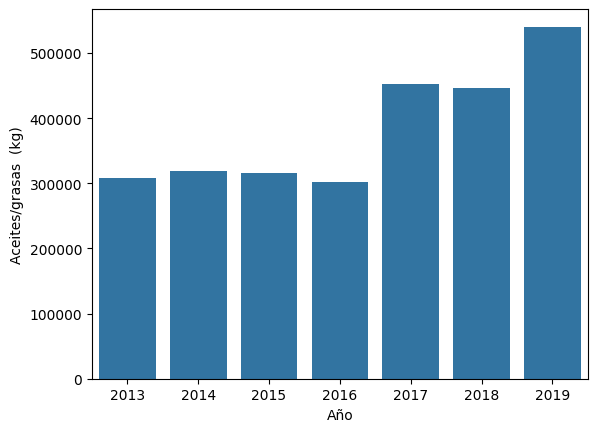

In [181]:
import seaborn as sns
sns.barplot(data = datos, x = 'Año', y = 'Aceites/grasas  (kg)')

## Bajando datos de la calidad del aire

También existe un dataset en Kaggle, pero vamos a ver un ejemplo

In [188]:
import pandas as pd

url2 = "https://datos.madrid.es/egob/catalogo/201410-10306621-calidad-aire-diario.csv"

datos=pd.read_csv(url2, sep=";")


In [189]:
datos

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2024,2,3.0,V,2.0,...,2.0,V,2.0,V,2.0,V,0,N,0,N
1,28,79,4,6,28079004_6_48,2024,2,0.6,V,0.5,...,0.4,V,0.5,V,0.5,V,0,N,0,N
2,28,79,4,7,28079004_7_8,2024,2,59.0,V,36.0,...,5.0,V,10.0,V,21.0,V,0,N,0,N
3,28,79,4,8,28079004_8_8,2024,2,41.0,V,33.0,...,21.0,V,35.0,V,29.0,V,0,N,0,N
4,28,79,4,12,28079004_12_8,2024,2,132.0,V,88.0,...,28.0,V,51.0,V,62.0,V,0,N,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,28,79,60,7,28079060_7_8,2024,2,20.0,V,23.0,...,3.0,V,4.0,V,15.0,V,0,N,0,N
125,28,79,60,8,28079060_8_8,2024,2,43.0,V,41.0,...,9.0,V,20.0,V,29.0,V,0,N,0,N
126,28,79,60,10,28079060_10_47,2024,2,33.0,V,30.0,...,6.0,V,8.0,V,9.0,V,0,N,0,N
127,28,79,60,12,28079060_12_8,2024,2,73.0,V,76.0,...,14.0,V,27.0,V,52.0,V,0,N,0,N


# OpenStreetMap

In [190]:
# Amenities
# https://wiki.openstreetmap.org/wiki/Key:amenity

import requests
import json
import pandas as pd
overpass_url = "http://overpass-api.de/api/interpreter"

overpass_query = """
[out:json];
node["amenity"="cafe"]
  (40.420801, -3.694702,40.423754, -3.688167); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()

<Response [200]>


In [191]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.62 7c32a7d5',
 'osm3s': {'timestamp_osm_base': '2024-03-22T13:49:03Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 2977298934,
   'lat': 40.4210523,
   'lon': -3.689841,
   'tags': {'addr:city': 'Madrid',
    'addr:housenumber': '4',
    'addr:street': 'Calle de Villalar',
    'amenity': 'cafe',
    'cuisine': 'regional',
    'internet_access': 'yes',
    'name': 'Café Villalar',
    'phone': '+34 914358937',
    'website': 'https://cafeteriavillalar.eatbu.com/'}},
  {'type': 'node',
   'id': 3426617375,
   'lat': 40.4221948,
   'lon': -3.6923421,
   'tags': {'amenity': 'cafe',
    'name': 'Gran Café Gijón',
    'phone': '+34 915 215 425',
    'website': 'https://cafegijon.com/',
    'wikidata': 'Q1025608',
    'wikipedia': 'es:Café Gijón'}},
  {'type': 'node',
   'id': 4703448419,
   'lat': 40.4229908,
   'lon': -3.693

In [15]:
data.keys()

dict_keys(['version', 'generator', 'osm3s', 'elements'])

In [192]:
data.get('osm3s')

{'timestamp_osm_base': '2024-03-22T13:49:03Z',
 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}

In [193]:
data['osm3s']

{'timestamp_osm_base': '2024-03-22T13:49:03Z',
 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}

In [194]:
data['osm3s']['copyright']

'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'

In [195]:
data['elements'][0].get('tags').get('addr:street', 34)

'Calle de Villalar'

In [196]:
for element in data['elements']:
    print(element)

{'type': 'node', 'id': 2977298934, 'lat': 40.4210523, 'lon': -3.689841, 'tags': {'addr:city': 'Madrid', 'addr:housenumber': '4', 'addr:street': 'Calle de Villalar', 'amenity': 'cafe', 'cuisine': 'regional', 'internet_access': 'yes', 'name': 'Café Villalar', 'phone': '+34 914358937', 'website': 'https://cafeteriavillalar.eatbu.com/'}}
{'type': 'node', 'id': 3426617375, 'lat': 40.4221948, 'lon': -3.6923421, 'tags': {'amenity': 'cafe', 'name': 'Gran Café Gijón', 'phone': '+34 915 215 425', 'website': 'https://cafegijon.com/', 'wikidata': 'Q1025608', 'wikipedia': 'es:Café Gijón'}}
{'type': 'node', 'id': 4703448419, 'lat': 40.4229908, 'lon': -3.6936524, 'tags': {'addr:city': 'Madrid', 'addr:housenumber': '6', 'addr:postcode': '28004', 'addr:street': 'Calle del Marqués de Monasterio', 'amenity': 'cafe', 'contact:facebook': 'https://www.facebook.com/hermanasae', 'contact:instagram': 'https://www.instagram.com/hermanasarce/', 'cuisine': 'cake', 'disused:amenity': 'restaurant', 'name': 'Hermana

In [197]:
def json_to_dataframe(data_entrada):
    elements = data_entrada['elements']
    places = {'lat': [], 'lon': [], 'name': [], 'address': []}

    for i in elements:
        lalitude = i['lat']
        longitude = i['lon']
        name = i['tags'].get('name')
        street = i['tags'].get('addr:street', 'Calle x')
        number = i['tags'].get('addr:housenumber', 999)
        
        places['lat'].append(lalitude)
        places['lon'].append(longitude)
        places['name'].append(name)
        places['address'].append(str(street) + ' ' + str(number))

    df = pd.DataFrame(places)
    return df

In [203]:
sitios = json_to_dataframe(data)

In [204]:
sitios

,lat,lon,name,address
0,40.421052,-3.689841,Café Villalar,Calle de Villalar 4
1,40.422195,-3.692342,Gran Café Gijón,Calle x 999
2,40.422991,-3.693652,Hermanas Arce,Calle del Marqués de Monasterio 6
3,40.422325,-3.690974,Santagloria,Calle de Recoletos 1
4,40.421875,-3.690123,masticar,Calle x 999


In [214]:
import folium
map = folium.Map(location=[40.420801, -3.694702], zoom_start=15)
for point in range(0, len(sitios)):
    folium.Marker((sitios.iloc[point]["lat"], sitios.iloc[point]["lon"]), popup=sitios.iloc[point]['name']).add_to(map)

In [216]:
map

## Datos del espacio

In [9]:
'''
https://thespacedevs.com/llapi
https://ll.thespacedevs.com/2.2.0/swagger
'''
space_url = "http://ll.thespacedevs.com/2.2.0"

path = "/astronaut"

url_total = space_url + path

response = requests.get(url_total)

In [10]:
print(response.status_code)
type(response.content)
response.json()

200


{'count': 758,
 'next': 'https://ll.thespacedevs.com/2.2.0/astronaut/?limit=10&offset=10',
 'previous': None,
 'results': [{'id': 1,
   'url': 'https://ll.thespacedevs.com/2.2.0/astronaut/1/',
   'name': 'Thomas Pesquet',
   'status': {'id': 1, 'name': 'Active'},
   'type': {'id': 2, 'name': 'Government'},
   'in_space': False,
   'time_in_space': 'P396DT11H33M45S',
   'eva_time': 'P1DT15H54M',
   'age': 46,
   'date_of_birth': '1978-02-27',
   'date_of_death': None,
   'nationality': 'French',
   'bio': 'Thomas Gautier Pesquet is a French aerospace engineer, pilot, and European Space Agency astronaut. Pesquet was selected by ESA as a candidate in May 2009, and he successfully completed his basic training in November 2010. From November 2016 to June 2017, Pesquet was part of Expeditions 50 and 51 on the International Space Station as a flight engineer.',
   'twitter': 'https://twitter.com/Thom_astro',
   'instagram': 'https://instagram.com/thom_astro',
   'wiki': 'https://en.wikipedia.

In [11]:
url_total = space_url + path + "/?nationality=Cuban"

response = requests.get(url_total)

In [12]:
url_total

'http://ll.thespacedevs.com/2.2.0/astronaut/?nationality=Cuban'

In [29]:
response.json()

{'count': 1,
 'next': None,
 'previous': None,
 'results': [{'id': 261,
   'url': 'https://ll.thespacedevs.com/2.2.0/astronaut/261/',
   'name': 'Arnaldo Tamayo Méndez',
   'status': {'id': 2, 'name': 'Retired'},
   'type': {'id': 2, 'name': 'Government'},
   'date_of_birth': '1942-01-29',
   'date_of_death': None,
   'nationality': 'Cuban',
   'bio': 'Arnaldo Tamayo Méndez (born January 29, 1942) is a Cuban military officer, legislator, and former cosmonaut and the first person of African heritage in space. As a member of the crew of Soyuz 38, he became the first Cuban citizen and the first person from a country in the Western Hemisphere other than the United States to travel into Earth orbit.',
   'twitter': None,
   'instagram': None,
   'wiki': 'https://en.wikipedia.org/wiki/Arnaldo_Tamayo_M%C3%A9ndez',
   'agency': {'id': 63,
    'url': 'https://ll.thespacedevs.com/2.2.0/agencies/63/',
    'name': 'Russian Federal Space Agency (ROSCOSMOS)',
    'featured': True,
    'type': 'Gover